In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
from sklearn.model_selection import train_test_split

## Dataset

every male kid in town gets 20 to 30 PKR pocket money
every female kid in town gets 40 to 60 PKR pocket money

predict amount of daily pocket money based on make kids and female kids

In [98]:
N = 100 # samples
male_kids = np.random.randint(0, 5, N)
female_kids = np.random.randint(0, 5, N)
total_kids = male_kids + female_kids
pocket_money = male_kids * np.random.randint(20, 30, N) + female_kids * np.random.randint(40, 60, N)

In [99]:
dataset = pd.DataFrame({
  'male_kids':male_kids,
  'female_kids':female_kids,
  'total_kids':total_kids,
  'pocket_money':pocket_money
})
dataset

,male_kids,female_kids,total_kids,pocket_money
0,0,2,2,104
1,0,3,3,156
2,0,0,0,0
3,4,4,8,288
4,1,0,1,29
...,...,...,...,...
95,1,4,5,209
96,0,4,4,184
97,4,0,4,84
98,2,4,6,236


In [100]:
XTrain, XTest, YTrain, YTest = train_test_split(dataset[list(dataset.columns[:-1])], dataset['pocket_money'], test_size=0.2, shuffle=False)

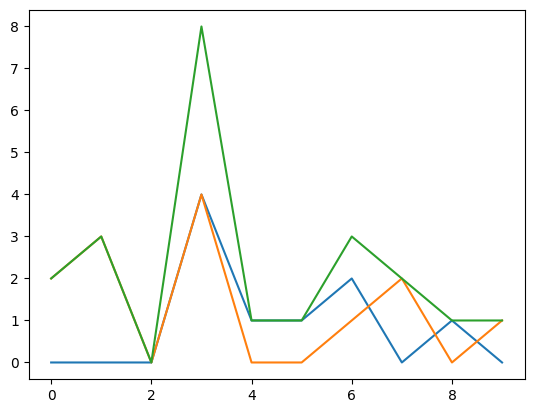

In [101]:
T=10
plt.plot(dataset['male_kids'][:10]) # blue
plt.plot(dataset['female_kids'][:10]) # orange
plt.plot(dataset['total_kids'][:10]) # green

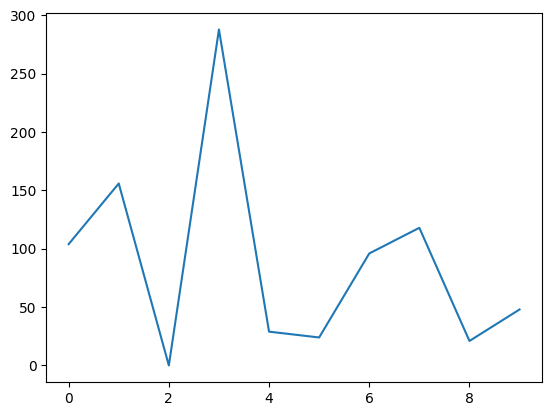

In [102]:
plt.plot(dataset['pocket_money'][:10])


![polynomial](../_/media/3-ml/polynomial.png)
![polynomial order ot use](../_/media/3-ml/poly-order.png)

## Model

In [103]:
dataset.columns

Index(['male_kids', 'female_kids', 'total_kids', 'pocket_money'], dtype='object')

In [104]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
_XTrain = pf.fit_transform(XTrain)
_XTest = pf.fit_transform(XTest)

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(_XTrain, YTrain)

LinearRegression()

In [114]:
XTest = np.array(XTest)

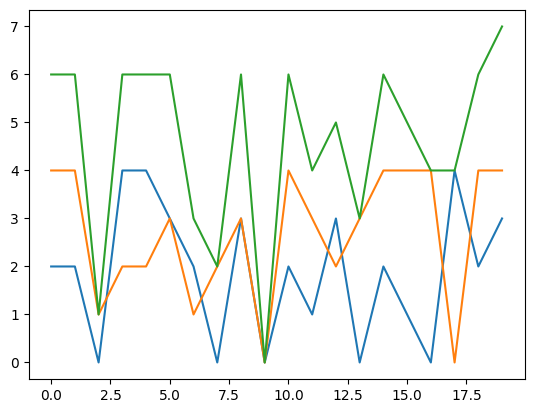

In [115]:
plt.plot([x[0] for x in XTest])
plt.plot([x[1] for x in XTest])
plt.plot([x[2] for x in XTest])

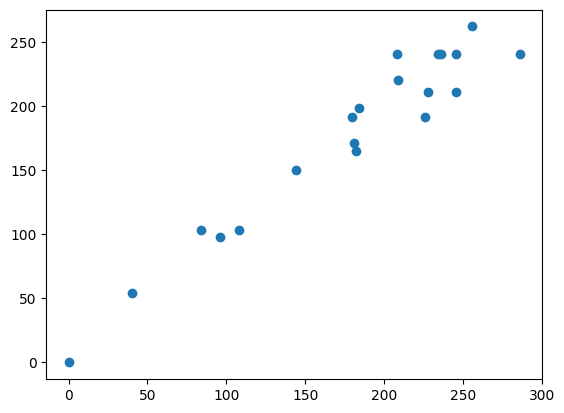

In [117]:
# plt.scatter(YTest[-10:], model.predict(XTest)[-10:])
plt.scatter(YTest, model.predict(_XTest))

In [118]:
# w and b
print(model.coef_, model.intercept_)

[ 0.00000000e+00 -1.72433051e+00  3.03315349e+01  2.86072044e+01
 -1.10806271e+00  1.04893777e+00 -5.91249390e-02 -2.31373771e+00
 -1.26479994e+00 -1.32392488e+00  3.69938054e-01 -2.22438256e-01
  1.47499799e-01  4.91984425e-02 -1.73239813e-01 -2.57400143e-02
  2.19851477e-01  2.69049919e-01  9.58101063e-02  7.00700920e-02] -0.5185274506387145


## Scratch

/home/anderson/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


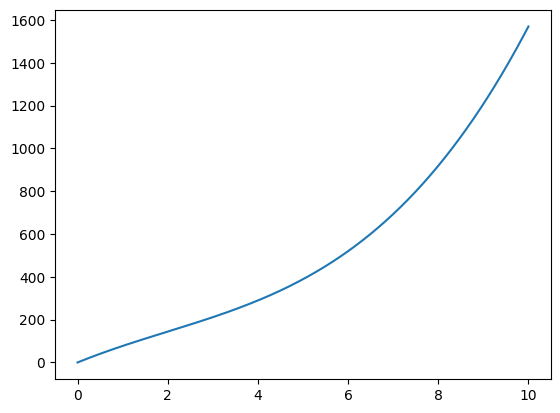

In [119]:
line = np.linspace(0, 10, 1000)

# plt.scatter(dataset['total_kids'], dataset['pocket_money'])
plt.plot(line, model.predict(pf.transform([[x, x, 2*x] for x in line])))